<a href="https://colab.research.google.com/github/Gautami-2607/Data-Analytics-/blob/main/01_C_03_EKG_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Setup

## 1.1 Install Libraries


In [ ]:
!pip install -qq neo4j-driver
!pip install -qq py2neo pandas matplotlib sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.9/187.9 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.0/177.0 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
!rm -rf neo_lib.py
!wget -qq https://raw.githubusercontent.com/tadinve/neo4j-lib/master/neo_lib.py -O neo_lib.py
from neo_lib import Neo_lib

## 1.2 Setup Defaults

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1.3 Create and Login to Neo4j


1. Goto https://sandbox.neo4j.com
1. Login in with your gmail account
1. Create a blank database as shown below.


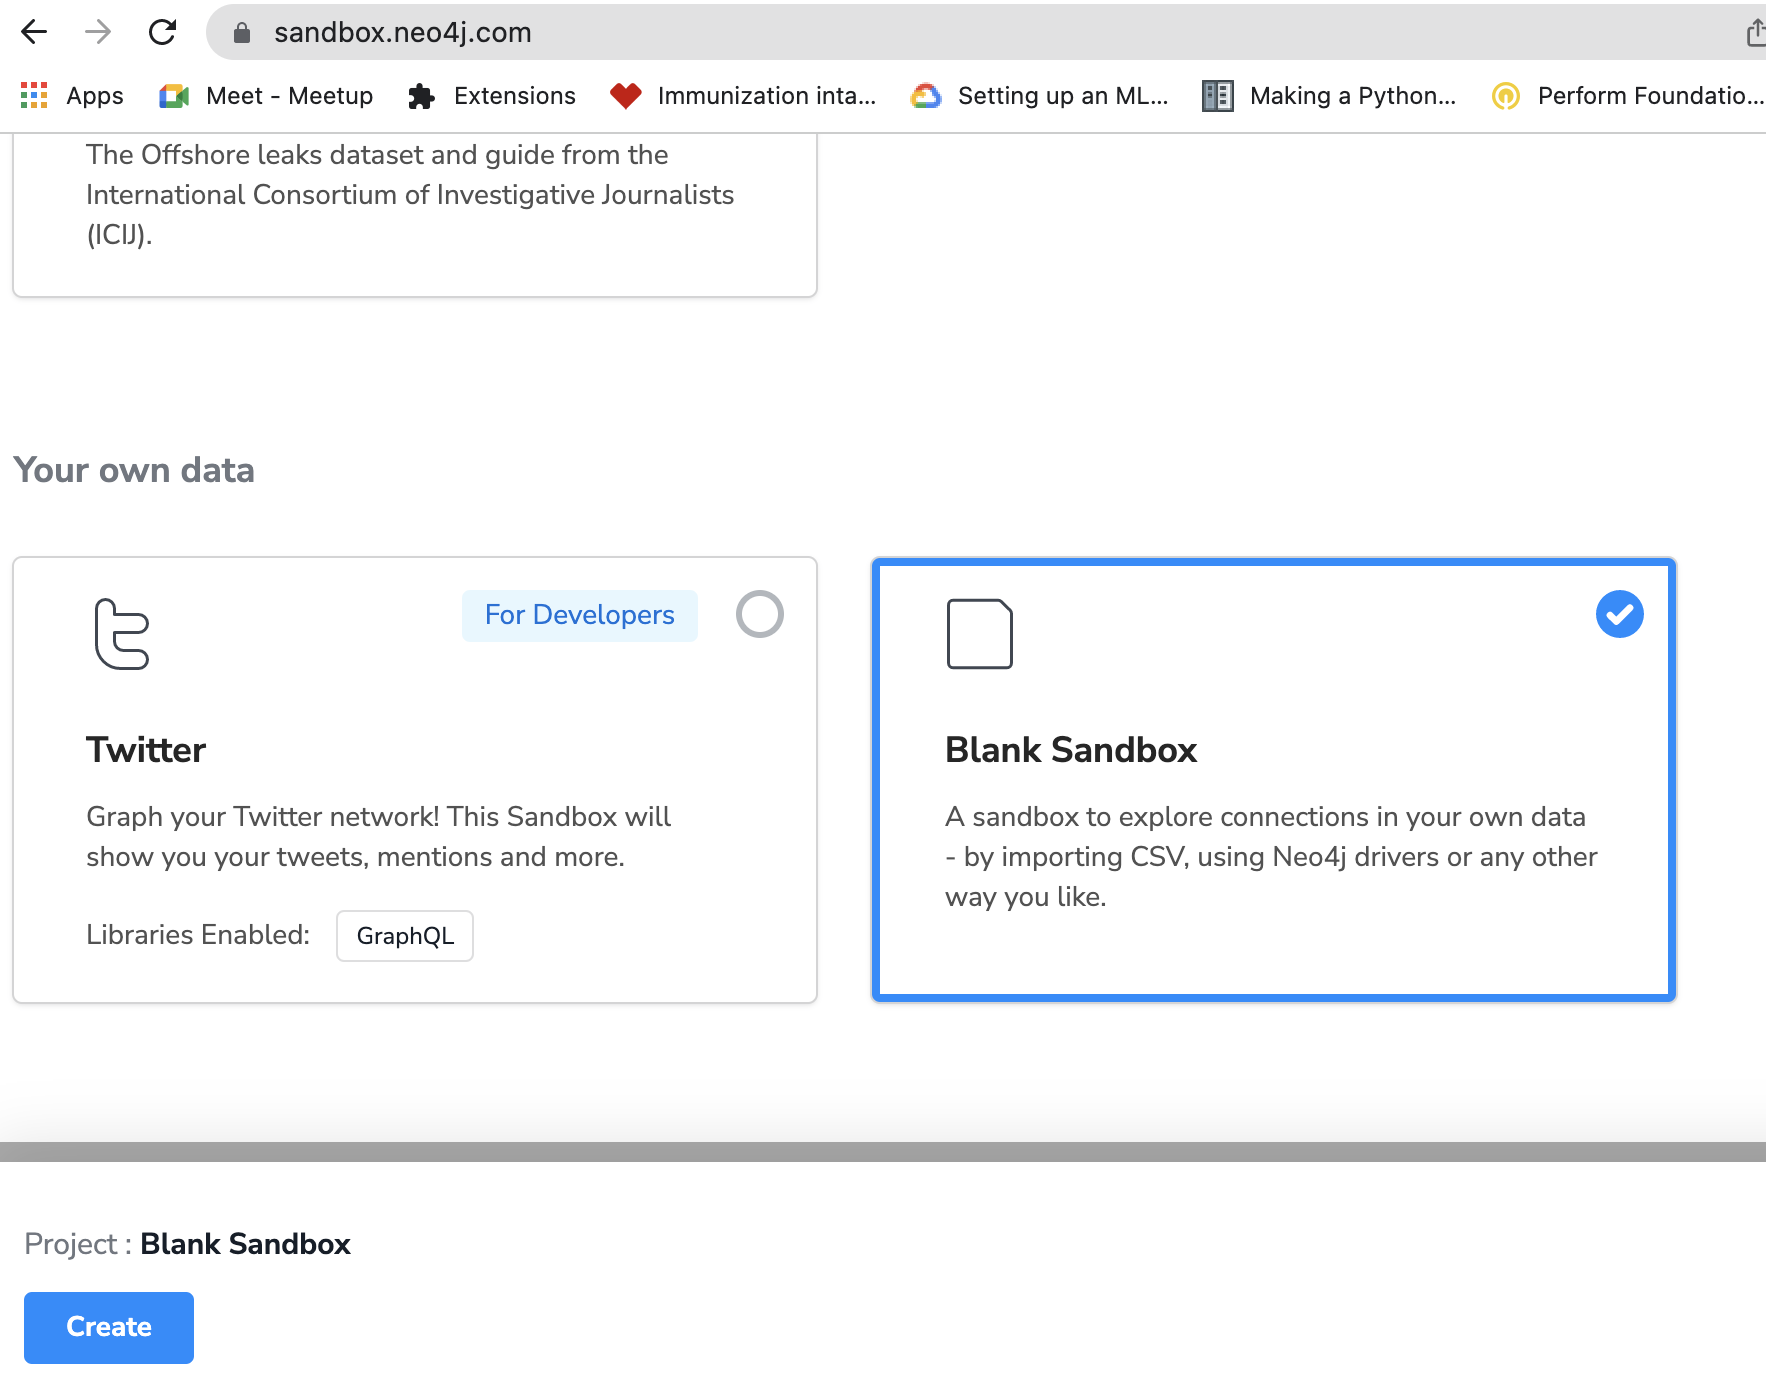

## 1.4 Connect to *Neo4j*

1. Open sandbox project you created.
1. Select the connectio tab as shown below.
1. Copy the url and password and update the cell below.

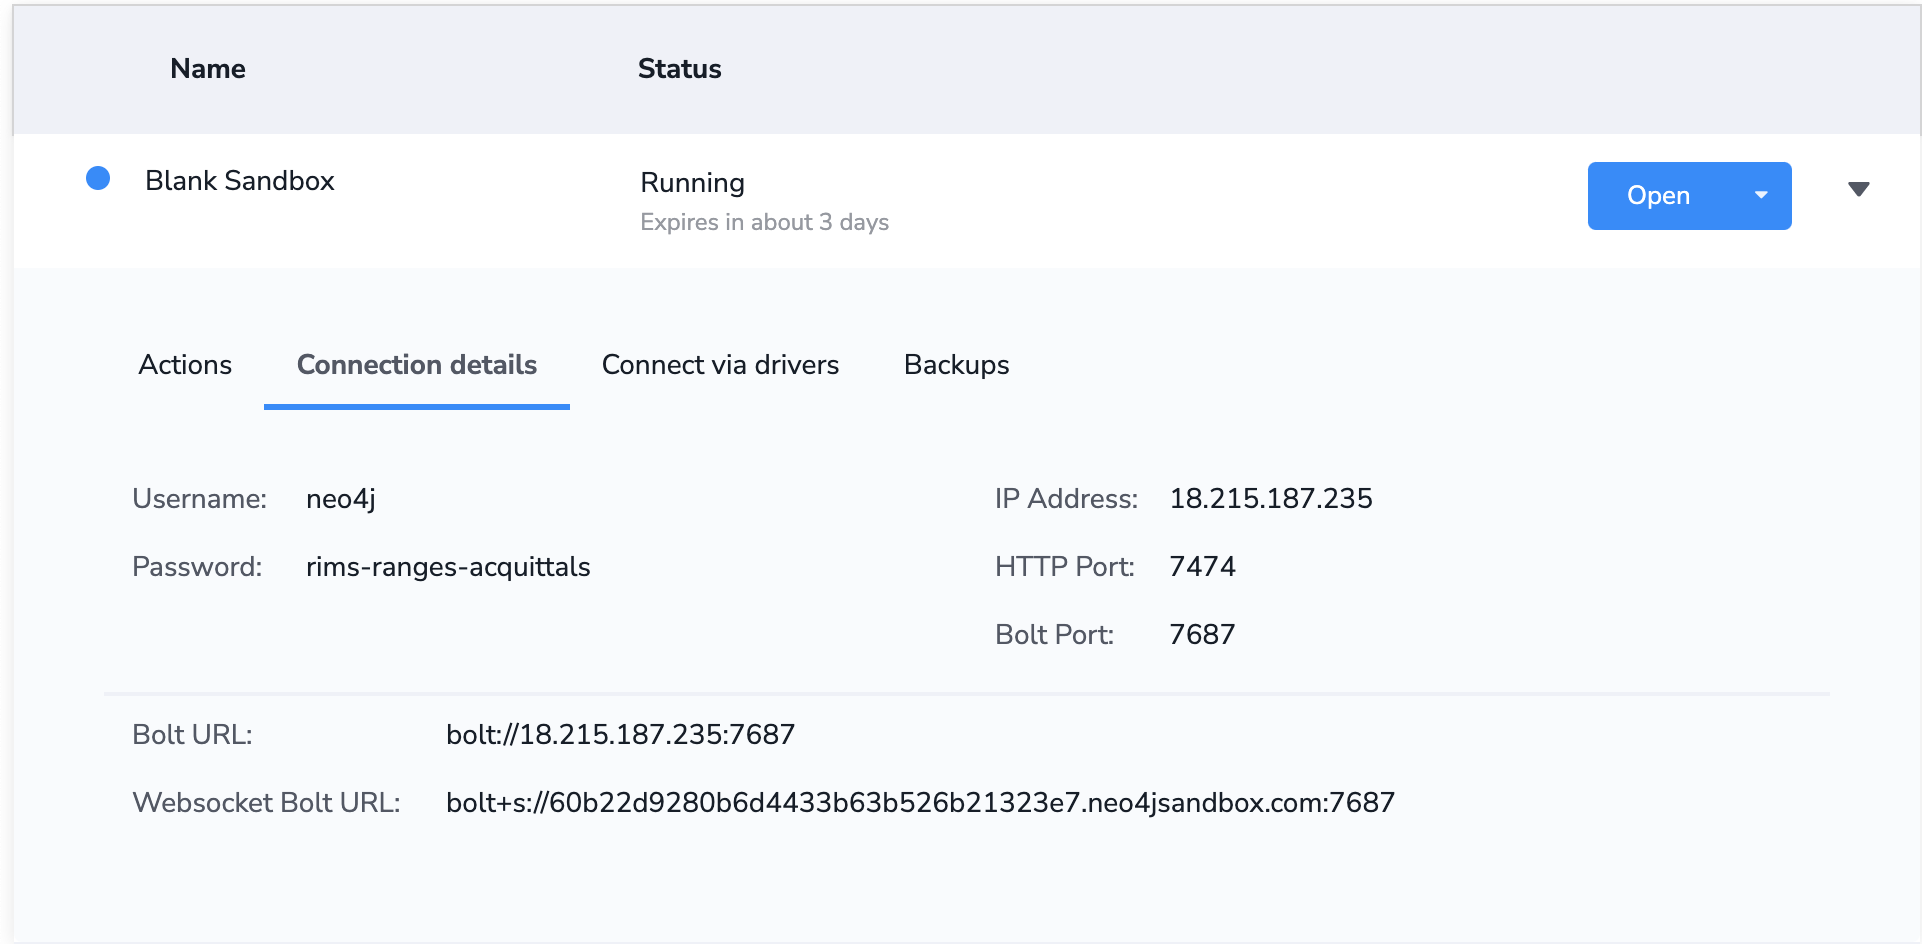

In [ ]:
neo_url = "bolt://44.203.56.74:7687"
neo_user = "neo4j"
neo_pwd = "quiets-cashier-breach"
neo_database = "neo4j"

nl = Neo_lib(neo_url, neo_user, neo_pwd,neo_database)

## 1.5 Reset Database

In [ ]:
nl.get_stats()

,labelCount,relTypeCount,propertyKeyCount,nodeCount,relCount
0,0,0,0,0,0


In [ ]:
nl.checksum()

0

In [ ]:
nl.reset_db()

[]

In [ ]:
nl.get_stats_all()

,labelCount,relTypeCount,propertyKeyCount,nodeCount,relCount,labels,relTypes,relTypesCount,stats
0,0,0,0,0,0,{},{},{},"{'relTypeCount': 0, 'propertyKeyCount': 0, 'la..."


In [ ]:
nl.schema_view()

Run CALL db.schema.visualization() in Neo4j Browser to see a graphical view


[{'nodes': [], 'relationships': []}]

In [ ]:
cq = "CALL db.propertyKeys()"
nl.run_cypher_pd(cq)

""


# 2 Load Data

## 2.1 Load Movies Database

### 2.1 Create Constsraints.

In [ ]:
!rm -rf movies.cypher*
!wget -qq https://raw.githubusercontent.com/neo4j-graph-examples/movies/main/scripts/movies.cypher -O movies.cypher
with open('movies.cypher', 'r') as file:
    data = file.read()
nl.reset_db()
scripts = data.split(";")
for script in scripts:
    if len(script) > 1:
        nl.run_cypher(script)

### 2.1.4 View Summary

In [ ]:
nl.get_stats()

,labelCount,relTypeCount,propertyKeyCount,nodeCount,relCount
0,2,6,8,171,253


In [ ]:
nl.node_count()

,count
0,171


In [ ]:
nl.label_count()

,Label,Count
0,Person,133
1,Movie,38


In [ ]:
x = nl.schema_view()
y = x[0]['relationships']
for i in y:
    print(i[0]['name'],i[1],i[2]['name'])

Run CALL db.schema.visualization() in Neo4j Browser to see a graphical view
Person ACTED_IN Movie
Person REVIEWED Movie
Person PRODUCED Movie
Person WROTE Movie
Person FOLLOWS Person
Person DIRECTED Movie


In [ ]:
cq = "MATCH (n) WHERE NOT (n)--() RETURN COUNT(n)"
nl.run_cypher(cq)

[{'COUNT(n)': 0}]

In [ ]:
cq = "MATCH (n) WHERE NOT (n)--() RETURN n"
nl.run_cypher(cq)

[]

In [ ]:
nl.relationship_count()

Run CALL db.schema.visualization() in Neo4j Browser to see a graphical view


,From,Relationship,To,Count
0,Person,ACTED_IN,Movie,344
1,Person,REVIEWED,Movie,18
2,Person,PRODUCED,Movie,30
3,Person,WROTE,Movie,20
4,Person,FOLLOWS,Person,6
5,Person,DIRECTED,Movie,88


In [ ]:
df = nl.relationship_count()


Run CALL db.schema.visualization() in Neo4j Browser to see a graphical view


In [ ]:
df.head()

,From,Relationship,To,Count
0,Person,ACTED_IN,Movie,344
1,Person,REVIEWED,Movie,18
2,Person,PRODUCED,Movie,30
3,Person,WROTE,Movie,20
4,Person,FOLLOWS,Person,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   From          6 non-null      object
 1   Relationship  6 non-null      object
 2   To            6 non-null      object
 3   Count         6 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


In [ ]:
cq = """
match (n:Person {name:'Tom Hanks'})-[r]-(m:Movie)
return n.name,type(r),m.title
"""
nl.run_cypher(cq)

[{'m.title': 'Apollo 13', 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': "You've Got Mail", 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': 'A League of Their Own',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'Joe Versus the Volcano',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'That Thing You Do',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'The Da Vinci Code',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'Cloud Atlas', 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': 'Cast Away', 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': 'The Green Mile', 'n.name': 'Tom Hanks', 'type(r)': 'ACTED_IN'},
 {'m.title': 'Sleepless in Seattle',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': 'The Polar Express',
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title': "Charlie Wilson's War",
  'n.name': 'Tom Hanks',
  'type(r)': 'ACTED_IN'},
 {'m.title':

In [ ]:
cq = """
match (n:Person {name:'Tom Hanks'})-[r]-(m:Movie)
return n.name,type(r),m.title
"""
nl.run_cypher_pd(cq)

,n.name,type(r),m.title
0,Tom Hanks,ACTED_IN,Apollo 13
1,Tom Hanks,ACTED_IN,You've Got Mail
2,Tom Hanks,ACTED_IN,A League of Their Own
3,Tom Hanks,ACTED_IN,Joe Versus the Volcano
4,Tom Hanks,ACTED_IN,That Thing You Do
5,Tom Hanks,ACTED_IN,The Da Vinci Code
6,Tom Hanks,ACTED_IN,Cloud Atlas
7,Tom Hanks,ACTED_IN,Cast Away
8,Tom Hanks,ACTED_IN,The Green Mile
9,Tom Hanks,ACTED_IN,Sleepless in Seattle


In [ ]:
cq = """
match (n:Person {name:'Tom Hanks'})-[r]-(m:Movie)
return n.name as Name,type(r) as Role,m.title as Title
"""
df = nl.run_cypher_pd(cq)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    13 non-null     object
 1   Role    13 non-null     object
 2   Title   13 non-null     object
dtypes: object(3)
memory usage: 440.0+ bytes


In [ ]:
df.head()

,Name,Role,Title
0,Tom Hanks,ACTED_IN,Apollo 13
1,Tom Hanks,ACTED_IN,You've Got Mail
2,Tom Hanks,ACTED_IN,A League of Their Own
3,Tom Hanks,ACTED_IN,Joe Versus the Volcano
4,Tom Hanks,ACTED_IN,That Thing You Do


In [ ]:
df

,Name,Role,Title
0,Tom Hanks,ACTED_IN,Apollo 13
1,Tom Hanks,ACTED_IN,You've Got Mail
2,Tom Hanks,ACTED_IN,A League of Their Own
3,Tom Hanks,ACTED_IN,Joe Versus the Volcano
4,Tom Hanks,ACTED_IN,That Thing You Do
5,Tom Hanks,ACTED_IN,The Da Vinci Code
6,Tom Hanks,ACTED_IN,Cloud Atlas
7,Tom Hanks,ACTED_IN,Cast Away
8,Tom Hanks,ACTED_IN,The Green Mile
9,Tom Hanks,ACTED_IN,Sleepless in Seattle


# 3 Excercises

## 3.1 Basics

In [ ]:
#Do your assginements here

## 3.2 Where

### 3.2.1 Simple Query
Return all Person nodes of people who wrote movies:

In [ ]:
# There should be 10 rows returned.
cq = """
Your query goes here
"""
nl.run_cypher_pd(cq)

ClientError: ignored

### 3.2.2  Query with exclusions
Return all Person nodes of people who wrote movies but did not direct that movie

In [ ]:
# There should be 6 rows returned.
cq = """
Your query goes here
"""
nl.run_cypher_pd(cq)

### 3.2.3  Query with AND
Find Gene Hackman and the movies that he acted in with another person who also directed the movie.

In [ ]:
# There should be one row with actor CE and movie U
cq = """
your query here
"""
nl.run_cypher_pd(cq)

### 3.2.4  Testing with list values

retrieve Person nodes of people born in 1965 or 1970 (Note: it is an OR and not from and to)

In [ ]:
# There should be 7 rows
cq = """
// Your query goes here

"""
nl.run_cypher_pd(cq)

### 3.2.5  Testing with list values

Return the name of the actor who played Neo in the movie The Matrix:

In [ ]:
# You should get KR
cq = """
// Your query goes here
"""
nl.run_cypher_pd(cq)

## 3.3 Patterns

### 3.3.1 Traversal in a MATCH clause

find all of the followers of people who reviewed the movie, The Replacements.

In [ ]:
# You should get three rows
cq = """
// Your query goes here

"""
nl.run_cypher_pd(cq)

### 3.3.2 Traversal in a MATCH clause

retrieve the actors who acted in the same movies as Keanu Reeves, but not when Hugo Weaving acted in the same movie.

In [ ]:
# You should get 10 rows
cq = """
// Your query goes here

"""
nl.run_cypher_pd(cq)

### 3.3.3 Another Traversal in a MATCH clause

retrieve the movies that Meg Ryan acted in and their respective directors, as well as the other actors that acted in these movies

In [ ]:
# You should get 20 rows
cq = """
// Your query goes here

"""
nl.run_cypher_pd(cq)

### 3.3.4 Specifying varying length paths

retrieve all Person nodes that are exactly two hops away from 'Paul Blythe'

In [ ]:
# You should get one name JT
cq = """
// Your query goes here

"""
nl.run_cypher_pd(cq)

### 3.3.5 Shortest Path
discover a shortest path between the movies The Matrix and A Few Good Men

In [ ]:
# You should get one name JT
cq = """
// Your query goes here
MATCH p = shortestPath((m1:Movie)-[*]-(m2:Movie))
WHERE m1.title = 'A Few Good Men' AND
      m2.title = 'The Matrix'
RETURN  p
"""
nl.run_cypher(cq)
# Run your query in Neo Browser to see this graph

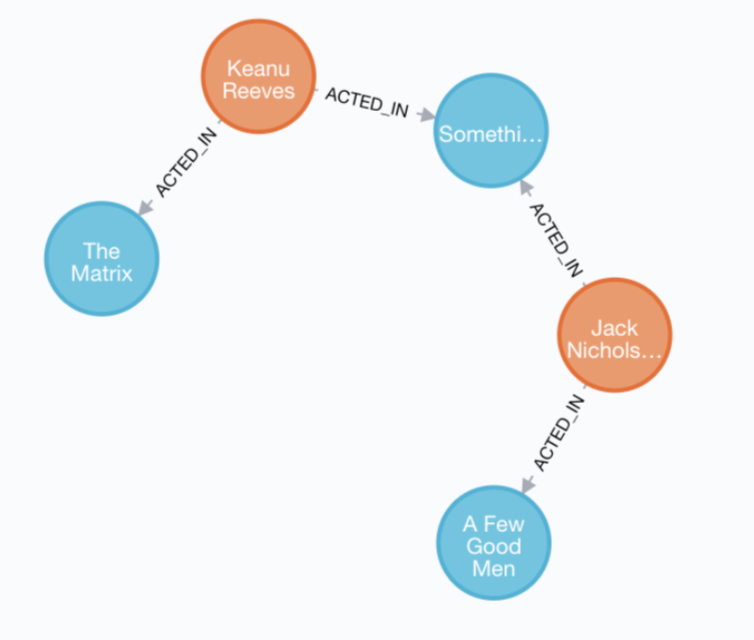

### 3.3.6 Returning a subgraph
we want a subgraph of all nodes connected to the movie, The Replacements:

In [ ]:
# You should get one name JT
cq = """
// Your query goes here
MATCH paths = (m:Movie)--(p:Person)
WHERE m.title = 'The Replacements'
RETURN paths
"""
nl.run_cypher(cq)
# Run your query in Neo Browser to see this graph

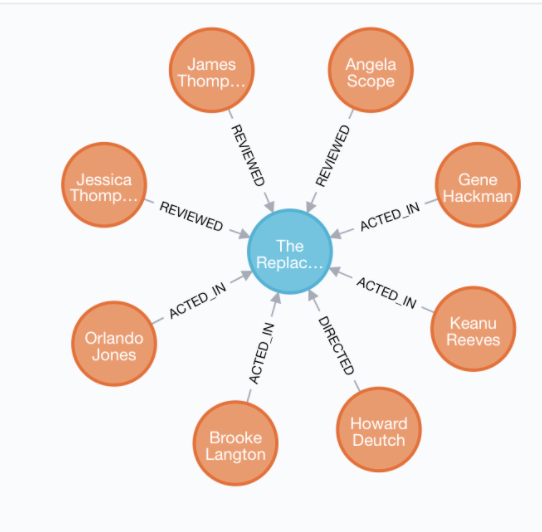

## 3.4 CYPHER WHERE clause

### 3.4.1: Retrieve all movies that Tom Cruise acted in (Instructions)
Retrieve all movies that Tom Cruise acted in and return their titles.
Hint: Use a WHERE clause.
Hint: You must specify a variable for the Person and Movie nodes as they are used in the WHERE and RETURN clauses.


In [ ]:
cq = """
MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WHERE a.name = 'Tom Cruise'
RETURN m.title as Movie
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


3


,Movie
0,Jerry Maguire
1,Top Gun
2,A Few Good Men


### 3.4.2: Retrieve all people that were born in the 70’s (Instructions)
Retrieve all people that were born in the 70’s and return their names and year born.


In [ ]:
cq = """
MATCH (a:Person)
WHERE a.born >= 1970 AND a.born < 1980
RETURN a.name as Name, a.born as `Year Born`
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


17


,Name,Year Born
0,Jay Mohr,1970
1,River Phoenix,1970
2,Ethan Hawke,1970
3,Brooke Langton,1970
4,Noah Wyle,1971
5,Regina King,1971
6,Corey Feldman,1971
7,Rick Yune,1971
8,Paul Bettany,1971
9,Wil Wheaton,1972


### 3.4.3: Retrieve the actors who acted in the movie The Matrix who were born after 1960 (Instructions)
Retrieve the actors who acted in the movie The Matrix who were born after 1960, and return their names and year born.


In [ ]:
cq = """
MATCH (a:Person)-[:ACTED_IN]->(m:Movie)
WHERE a.born > 1960 AND m.title = 'The Matrix'
RETURN a.name as Name, a.born as `Year Born`
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


4


,Name,Year Born
0,Emil Eifrem,1978
1,Laurence Fishburne,1961
2,Carrie-Anne Moss,1967
3,Keanu Reeves,1964


### 3.4.4: Retrieve all movies by testing the node label and a property (Instructions)
Retrieve all movies released in 2000 by testing the node label and the released property, returning the movie titles.


In [ ]:
cq = """
MATCH (m)
WHERE m:Movie AND m.released = 2000
RETURN m.title
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


3


,m.title
0,Jerry Maguire
1,The Replacements
2,Cast Away


### 3.4.5: Retrieve all people that wrote movies by testing the relationship between two nodes (Instructions)
Retrieve all people that wrote movies by testing the relationship between two nodes, returning the names of the people and the titles of the movies.


In [ ]:
cq = """
MATCH (a)-[rel]->(m)
WHERE a:Person AND type(rel) = 'WROTE' AND m:Movie
RETURN a.name as Name, m.title as Movie
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


10


,Name,Movie
0,Aaron Sorkin,A Few Good Men
1,Jim Cash,Top Gun
2,Cameron Crowe,Jerry Maguire
3,Nora Ephron,When Harry Met Sally
4,David Mitchell,Cloud Atlas
5,Lana Wachowski,V for Vendetta
6,Lilly Wachowski,V for Vendetta
7,Lana Wachowski,Speed Racer
8,Lilly Wachowski,Speed Racer
9,Nancy Meyers,Something's Gotta Give


### 3.4.6: Retrieve all people in the graph that do not have a property (Instructions)
You will write Cypher queries using a WHERE clause to test existence.
Retrieve all people in the graph that do not have a born property, returning their names.


In [ ]:
cq = """
MATCH (a:Person)
WHERE NOT exists(a.born)
RETURN a.name as Name
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


5


,Name
0,Naomie Harris
1,Paul Blythe
2,Angela Scope
3,Jessica Thompson
4,James Thompson


### 3.4.7: Retrieve all people related to movies where the relationship has a property (Instructions)
You will write Cypher queries using a WHERE clause to test existence.
Retrieve all people related to movies where the relationship has the rating property, then return their name, movie title, and the rating.


In [ ]:
cq = """
MATCH (a:Person)-[rel]->(m:Movie)
WHERE exists(rel.rating)
RETURN a.name as Name, m.title as Movie, rel.rating as Rating
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


9


,Name,Movie,Rating
0,Jessica Thompson,Jerry Maguire,92
1,James Thompson,The Replacements,100
2,Angela Scope,The Replacements,62
3,Jessica Thompson,The Replacements,65
4,Jessica Thompson,The Birdcage,45
5,Jessica Thompson,Unforgiven,85
6,Jessica Thompson,Cloud Atlas,95
7,Jessica Thompson,The Da Vinci Code,68
8,James Thompson,The Da Vinci Code,65


### 3.4.8: Retrieve all actors whose name begins with James (Instructions)
Next you will practice queries that test string properties.
Retrieve all actors whose name begins with James, returning their names.


In [ ]:
cq = """
MATCH (a:Person)-[:ACTED_IN]->(:Movie)
WHERE a.name STARTS WITH 'James'
RETURN a.name
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


3


,a.name
0,James Cromwell
1,James Cromwell
2,James Marshall


### 3.4.9: Retrieve all REVIEWED relationships from the graph with filtered results (Instructions)
Retrieve all REVIEWED relationships from the graph where the summary of the review contains the string fun, returning the movie title reviewed and the rating and summary of the relationship.
Hint: You do not know what case the fun string will be in the summary text.


In [ ]:
cq = """
MATCH (:Person)-[r:REVIEWED]->(m:Movie)
WHERE toLower(r.summary) CONTAINS 'fun'
RETURN  m.title as Movie, r.summary as Review, r.rating as Rating
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


3


,Movie,Review,Rating
0,The Replacements,"Silly, but fun",65
1,The Replacements,Pretty funny at times,62
2,The Da Vinci Code,"Fun, but a little far fetched",65


### 3.4.10: Retrieve all people who have produced a movie, but have not directed a movie (Instructions)
Next, you will write queries that test patterns.
Retrieve all people who have produced a movie, but have not directed a movie, returning their names and the movie titles.


In [ ]:
cq = """
MATCH (a:Person)-[:PRODUCED]->(m:Movie)
WHERE NOT ((a)-[:DIRECTED]->(:Movie))
RETURN a.name, m.title
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


7


,a.name,m.title
0,Joel Silver,The Matrix
1,Joel Silver,The Matrix Reloaded
2,Joel Silver,The Matrix Revolutions
3,Stefan Arndt,Cloud Atlas
4,Joel Silver,V for Vendetta
5,Joel Silver,Speed Racer
6,Joel Silver,Ninja Assassin


### 3.4.11: Retrieve the movies and their actors where one of the actors also directed the movie (Instructions)
Retrieve the movies and their actors where one of the actors also directed the movie, returning the actors names, the director’s name, and the movie title.


In [ ]:
cq = """
MATCH (a1:Person)-[:ACTED_IN]->(m:Movie)<-[:ACTED_IN]-(a2:Person)
WHERE exists( (a2)-[:DIRECTED]->(m) )
RETURN  a1.name as Actor, a2.name as `Actor/Director`, m.title as Movie
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


7


,Actor,Actor/Director,Movie
0,Liv Tyler,Tom Hanks,That Thing You Do
1,Charlize Theron,Tom Hanks,That Thing You Do
2,Gene Hackman,Clint Eastwood,Unforgiven
3,Richard Harris,Clint Eastwood,Unforgiven
4,John C. Reilly,Danny DeVito,Hoffa
5,J.T. Walsh,Danny DeVito,Hoffa
6,Jack Nicholson,Danny DeVito,Hoffa


### 3.4.12: Retrieve all movies that were released in a set of years (Instructions)
Next you will perform queries using lists.
Retrieve all movies that were released in the years 2000, 2004, and 2008, returning their titles and release years.


In [ ]:
cq = """
MATCH (m:Movie)
WHERE m.released IN [2000, 2004, 2008]
RETURN m.title, m.released
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


6


,m.title,m.released
0,Jerry Maguire,2000
1,The Replacements,2000
2,Cast Away,2000
3,The Polar Express,2004
4,Speed Racer,2008
5,Frost/Nixon,2008


### 3.4.13: Retrieve the movies that have an actor’s role that is the name of the movie (Instructions)
Retrieve the movies that have an actor’s role that is the name of the movie, return the movie title and actor’s name


In [ ]:
cq = """
MATCH (a:Person)-[r:ACTED_IN]->(m:Movie)
WHERE m.title in r.roles
RETURN  m.title as Movie, a.name as Actor
"""
df = nl.run_cypher_pd(cq)
print(len(df.index))
df


4


,Movie,Actor
0,Jerry Maguire,Tom Cruise
1,Johnny Mnemonic,Keanu Reeves
2,Speed Racer,Emile Hirsch
3,Hoffa,Jack Nicholson
